In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import category_encoders as ce
import pickle as pkl
import xgboost as xgb  
import sklearn.linear_model as lm
import sklearn.feature_selection as fs

Data preprocessing

In [4]:
df = pd.read_csv('jordan_food_price.csv', parse_dates = ['date'])
df.insert(0, 'year',df.date.dt.year)
df.insert(1, 'month',df.date.dt.month)
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
# df['admin2'] = df['admin2'].fillna('National Average')
# df = df.drop(columns=['date','admin1','usdprice'])
# df
df

,year,month,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,price,usdprice
0,2011,1,2011-01-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Bread (pita),KG,0.16,0.2253
1,2011,1,2011-01-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Rice (imported),KG,0.90,1.2674
2,2011,1,2011-01-15,NaN,NaN,National Average,NaN,NaN,oil and fats,Oil (vegetable),1.8 L,1.50,2.1124
3,2011,1,2011-01-15,NaN,NaN,National Average,NaN,NaN,pulses and nuts,Pulses,KG,1.20,1.6899
4,2011,2,2011-02-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Bread (pita),KG,0.16,0.2253
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28825,2022,7,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,vegetables and fruits,Garlic,KG,3.45,4.8530
28826,2022,7,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,vegetables and fruits,Onions,KG,0.39,0.5477
28827,2022,7,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,vegetables and fruits,Oranges (big size),KG,1.14,1.6064
28828,2022,7,2022-07-15,Zarqa,Qasabet Az_Zarqa District,Zarqa,32.060791,36.09428,vegetables and fruits,Spinach,KG,0.77,1.0848


Encoding

In [4]:
X = df.drop('price', axis = 1)
y = df['price']

cat_col = ['admin2','market','category','commodity','unit']
num_col = ['year' ,'month', 'price']

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
X_train = df[df['year'] <= 2021]
X_test = df[df['year'] > 2021]
y_train = X_train['price']
y_test = X_test['price']
X_train = X_train.drop('price', axis = 1)
X_test = X_test.drop('price', axis = 1)
X_test

,year,month,admin2,market,latitude,longitude,category,commodity,unit
25916,2022,1,Qasabet Ajloun District,Ajloun,32.323627,35.718113,cereals and tubers,Bread (pita),KG
25917,2022,1,Qasabet Ajloun District,Ajloun,32.323627,35.718113,cereals and tubers,Bulgur,KG
25918,2022,1,Qasabet Ajloun District,Ajloun,32.323627,35.718113,cereals and tubers,Pasta,300 G
25919,2022,1,Qasabet Ajloun District,Ajloun,32.323627,35.718113,cereals and tubers,Potatoes,KG
25920,2022,1,Qasabet Ajloun District,Ajloun,32.323627,35.718113,cereals and tubers,Rice (imported),KG
...,...,...,...,...,...,...,...,...,...
28825,2022,7,Qasabet Az_Zarqa District,Zarqa,32.060791,36.094280,vegetables and fruits,Garlic,KG
28826,2022,7,Qasabet Az_Zarqa District,Zarqa,32.060791,36.094280,vegetables and fruits,Onions,KG
28827,2022,7,Qasabet Az_Zarqa District,Zarqa,32.060791,36.094280,vegetables and fruits,Oranges (big size),KG
28828,2022,7,Qasabet Az_Zarqa District,Zarqa,32.060791,36.094280,vegetables and fruits,Spinach,KG


In [6]:
from assignment_functions import encode_X_split

In [7]:
encoders = {'TE': ce.TargetEncoder(), 
            'OHE': ce.OneHotEncoder(), 
            'HE': ce.HashingEncoder(),
            'BE': ce.BinaryEncoder(),
            'LOOE': ce.LeaveOneOutEncoder()
}
X_train_enc_results = {}
X_test_enc_results = {}
accuracy_enc = {}
for name, enc in encoders.items():
    X_train_enc_results[name], X_test_enc_results[name] = encode_X_split(enc, X_train, X_test, y_train)
    accuracy_enc[name] = lm.LinearRegression().fit(X_train_enc_results.get(name), y_train).score(X_test_enc_results.get(name), y_test)

In [8]:
X_train_enc = X_train_enc_results.get('TE')
X_test_enc = X_test_enc_results.get('TE')
X_train_enc

,year,month,admin2,market,latitude,longitude,category,commodity,unit
0,2011,1,2.356677,2.356677,31.619018,35.880885,0.706476,0.275623,2.144380
1,2011,1,2.356677,2.356677,31.619018,35.880885,0.706476,1.245106,2.144380
2,2011,1,2.356677,2.356677,31.619018,35.880885,4.029099,1.898803,1.898803
3,2011,1,2.356677,2.356677,31.619018,35.880885,1.534207,1.633029,2.144380
4,2011,2,2.356677,2.356677,31.619018,35.880885,0.706476,0.275623,2.144380
...,...,...,...,...,...,...,...,...,...
25911,2021,12,2.075916,2.075916,32.060791,36.094280,1.096706,0.595911,2.144380
25912,2021,12,2.075916,2.075916,32.060791,36.094280,1.096706,2.980306,2.144380
25913,2021,12,2.075916,2.075916,32.060791,36.094280,1.096706,0.577003,2.144380
25914,2021,12,2.075916,2.075916,32.060791,36.094280,1.096706,0.541930,2.144380


In [9]:
X_output = X_test_enc.copy()
X_output['price'] = y_test
X_output.to_csv('food_price_testing_data.csv', index = False)

Model Training

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [11]:
from assignment_functions import compute_model, compute_accuracy

In [12]:
model_list = {
    "LR": lm.LinearRegression(),
    "RR": lm.Ridge(),
    "RFR": RandomForestRegressor(criterion='squared_error', random_state=0),
    "DT": DecisionTreeRegressor(),
    "XGB": xgb.XGBRegressor(),
    "MLP": MLPRegressor(random_state=1, max_iter=500),
    "KNR": KNeighborsRegressor(n_neighbors=2)
    }
model_list_fitted = {}
results = {}
predictions = {}
accuracy = {}
for name,model in model_list.items():
    results[name], predictions[name] = compute_model(model,X_train_enc,X_test_enc,y_train,y_test)
    accuracy[name] = compute_accuracy(y_test, predictions[name])

In [18]:
results

{'LR': 0.9840794356442696,
 'RR': 0.9840770225249176,
 'RFR': 0.9879376245996805,
 'DT': 0.9870673271701252,
 'XGB': 0.9887331018948239,
 'MLP': 0.9836455643147253,
 'KNR': 0.9856942540403022}

In [13]:
df_predictions = pd.DataFrame(df[df['year'] == 2022]['price'])

for name, pred in predictions.items():
    df_predictions[name] = pred
    df_predictions[name] =  df_predictions[name].round(2)

accuracy

{'LR': 0.8277282086479066,
 'RR': 0.8284145504461222,
 'RFR': 0.818805765271105,
 'DT': 0.8098833218943033,
 'XGB': 0.8318462594371997,
 'MLP': 0.7542896362388469,
 'KNR': 0.7501715854495539}

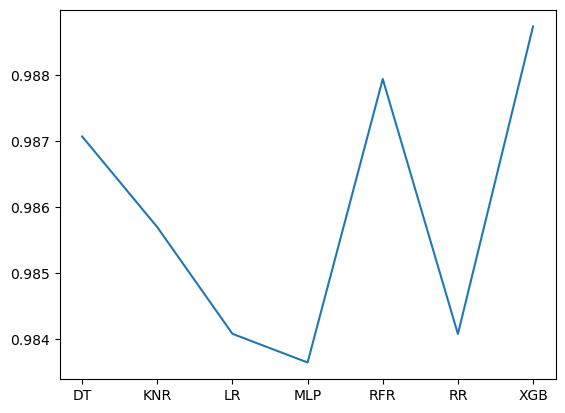

In [14]:
x, y = zip(*sorted(results.items()))
plt.plot(x, y)
plt.show()

Feature Selection

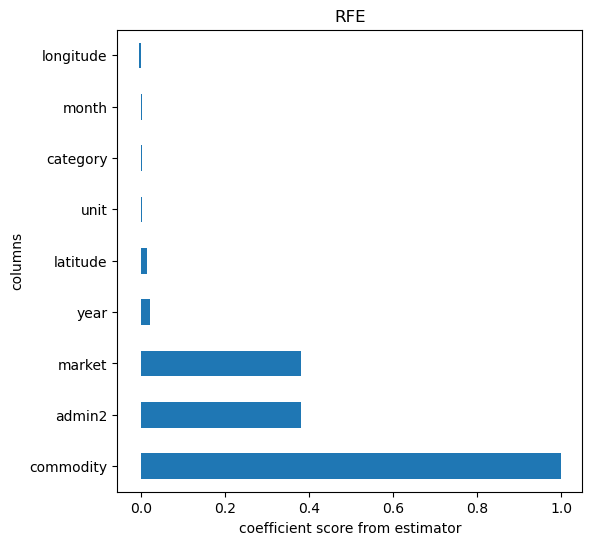

,RFE Coefficient,RFE Selected Features
7,0.999584,commodity
2,0.379554,admin2
3,0.379554,market
0,0.019949,year
4,0.014477,latitude
8,0.001145,unit
6,0.000690,category
1,0.000621,month
5,-0.006758,longitude


In [15]:
#RFE (Recursive Feature Elimination)

rfe_model = fs.RFE(lm.LinearRegression(), n_features_to_select = 9)
rfe_model = rfe_model.fit(X_train_enc,y_train) 
rfe_coef_score = rfe_model.estimator_.coef_
rfe_feat_cols = X_train_enc.columns[rfe_model.support_]
plt.figure(figsize = (6,6))
feat_importances_RFE = pd.Series(rfe_coef_score, index = rfe_feat_cols)
feat_importances_RFE.nlargest(9).plot(kind='barh')
plt.xlabel("coefficient score from estimator")
plt.ylabel("columns")
plt.title("RFE")
plt.show()
df_rfe = pd.DataFrame({'RFE Coefficient' : rfe_coef_score, 'RFE Selected Features' : rfe_feat_cols})
df_rfe.sort_values(by='RFE Coefficient', ascending=False)

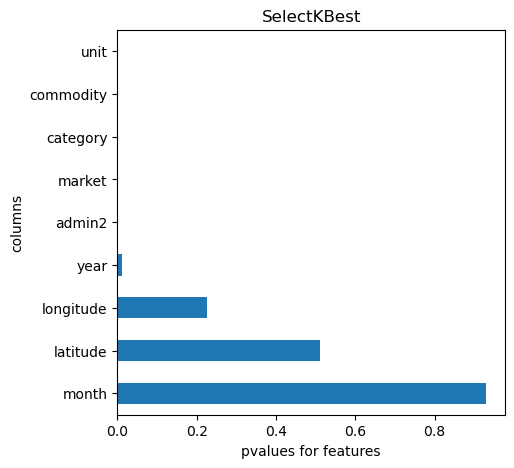

,SKBest pvalues,SKBest Selected Features
1,9.307870e-01,month
4,5.108059e-01,latitude
5,2.255383e-01,longitude
0,1.232636e-02,year
2,8.326505e-07,admin2
3,8.326505e-07,market
6,0.000000e+00,category
7,0.000000e+00,commodity
8,0.000000e+00,unit


In [16]:
#SelectKBest
skb_model = fs.SelectKBest(score_func=fs.f_regression, k = 9)
skb_model.fit_transform(X_train_enc, y_train)

skb_pvalue_score = skb_model.pvalues_
skb_feat_cols = X_train_enc.columns

plt.figure(figsize = (5,5))
feat_importances_skb = pd.Series(skb_pvalue_score, index = X_train_enc.columns)
feat_importances_skb.nlargest(9).plot(kind='barh')
plt.xlabel("pvalues for features")
plt.ylabel("columns")
plt.title("SelectKBest")
plt.show()

df_skbest = pd.DataFrame({'SKBest pvalues' : skb_pvalue_score, 'SKBest Selected Features' : skb_feat_cols})
df_skbest.sort_values(by='SKBest pvalues', ascending=False)

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_enc, y_train)
y_pred = xgb_model.predict(X_test_enc)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
mae = mean_absolute_error(y_test, y_pred)
print("mean absolute error (MAE):", mae)
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)
evs = explained_variance_score(y_test, y_pred)
print("explained variance score:", evs)


Root Mean Squared Error (RMSE): 0.2592758268146776
mean absolute error (MAE): 0.14851432502597017
r2 score: 0.9887331018948239
explained variance score: 0.9894827504625239
